In [2]:
!pip install matplotlib



  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata (52 kB)
Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl (8.1 MB)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Set2", 2)

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv' , low_memory=False)
print(f"Loaded dataset with shape: {df.shape}")

Loaded dataset with shape: (2260701, 151)


In [6]:
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None

Missing Values:
id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

Statistics:


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [7]:
threshold = 1000
df = df.drop(columns=[col for col in df.columns if df[col].isnull().sum() > threshold])

print("Remaining Columns:", len(df.columns))
print(df.columns)


Remaining Columns: 52
Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='o

In [8]:
print("\nMissing Values:")
print(max(df.isnull().sum()))


Missing Values:
178


In [9]:
df = df.dropna()
df = df.reset_index(drop=True)


In [10]:
df.shape

(2260451, 52)

In [11]:
df = df.drop(columns=['id','url','zip_code','addr_state'])

In [12]:
df.shape

(2260451, 48)

In [13]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1076654
Current                                                 878302
Charged Off                                             268543
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1921
Does not meet the credit policy. Status:Charged Off        739
Default                                                     40
Name: count, dtype: int64

In [14]:
status_map = {
    'Fully Paid': 0, 'Charged Off': 1, 'Default': 1,  'In Grace Period': 1, 
    'Current': 0, 'Late (16-30 days)': 1, 'Late (31-120 days)': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Late (31-120 days)': 1, 'Late (16-30 days)': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}

df['loan_status_binary'] = df['loan_status'].map(status_map).astype(int)


class_dist = df['loan_status_binary'].value_counts().sort_index()

print(f"\nClass distribution:")
for cls, count in class_dist.items():
    label = "Paid" if cls == 0 else "Default"
    print(f"  {cls} ({label}): {count:,} ({count/len(df)*100:.1f}%)")


Class distribution:
  0 (Paid): 1,956,877 (86.6%)
  1 (Default): 303,574 (13.4%)


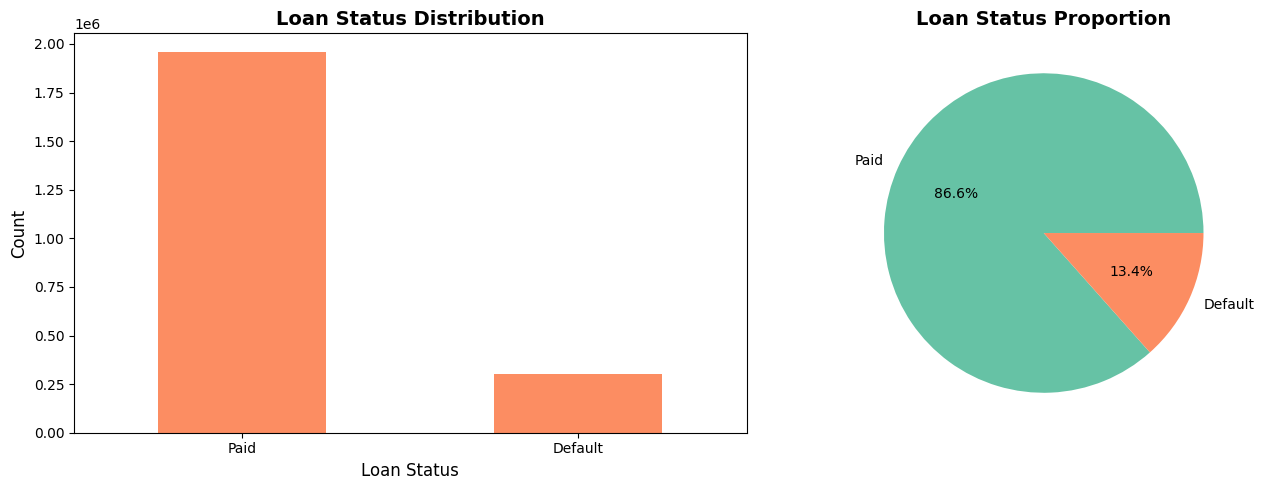


Class Distribution:
  Paid:    1,956,877 (86.6%)
  Default: 303,574 (13.4%)
  Default Rate: 13.43%


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

value_counts = df['loan_status_binary'].value_counts().sort_index()
value_counts.plot(kind='bar', ax=axes[0], color= palette[-1] )
axes[0].set_title('Loan Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Loan Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

tick_labels = ['Paid' if i == 0 else 'Default' for i in value_counts.index]
axes[0].set_xticklabels(tick_labels, rotation=0)

value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                  colors=palette [:len(value_counts)], 
                  labels=tick_labels)
axes[1].set_title('Loan Status Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\nClass Distribution:")
print(f"  Paid:    {(df['loan_status_binary']==0).sum():,} ({(df['loan_status_binary']==0).mean()*100:.1f}%)")
print(f"  Default: {(df['loan_status_binary']==1).sum():,} ({(df['loan_status_binary']==1).mean()*100:.1f}%)")
print(f"  Default Rate: {df['loan_status_binary'].mean()*100:.2f}%")

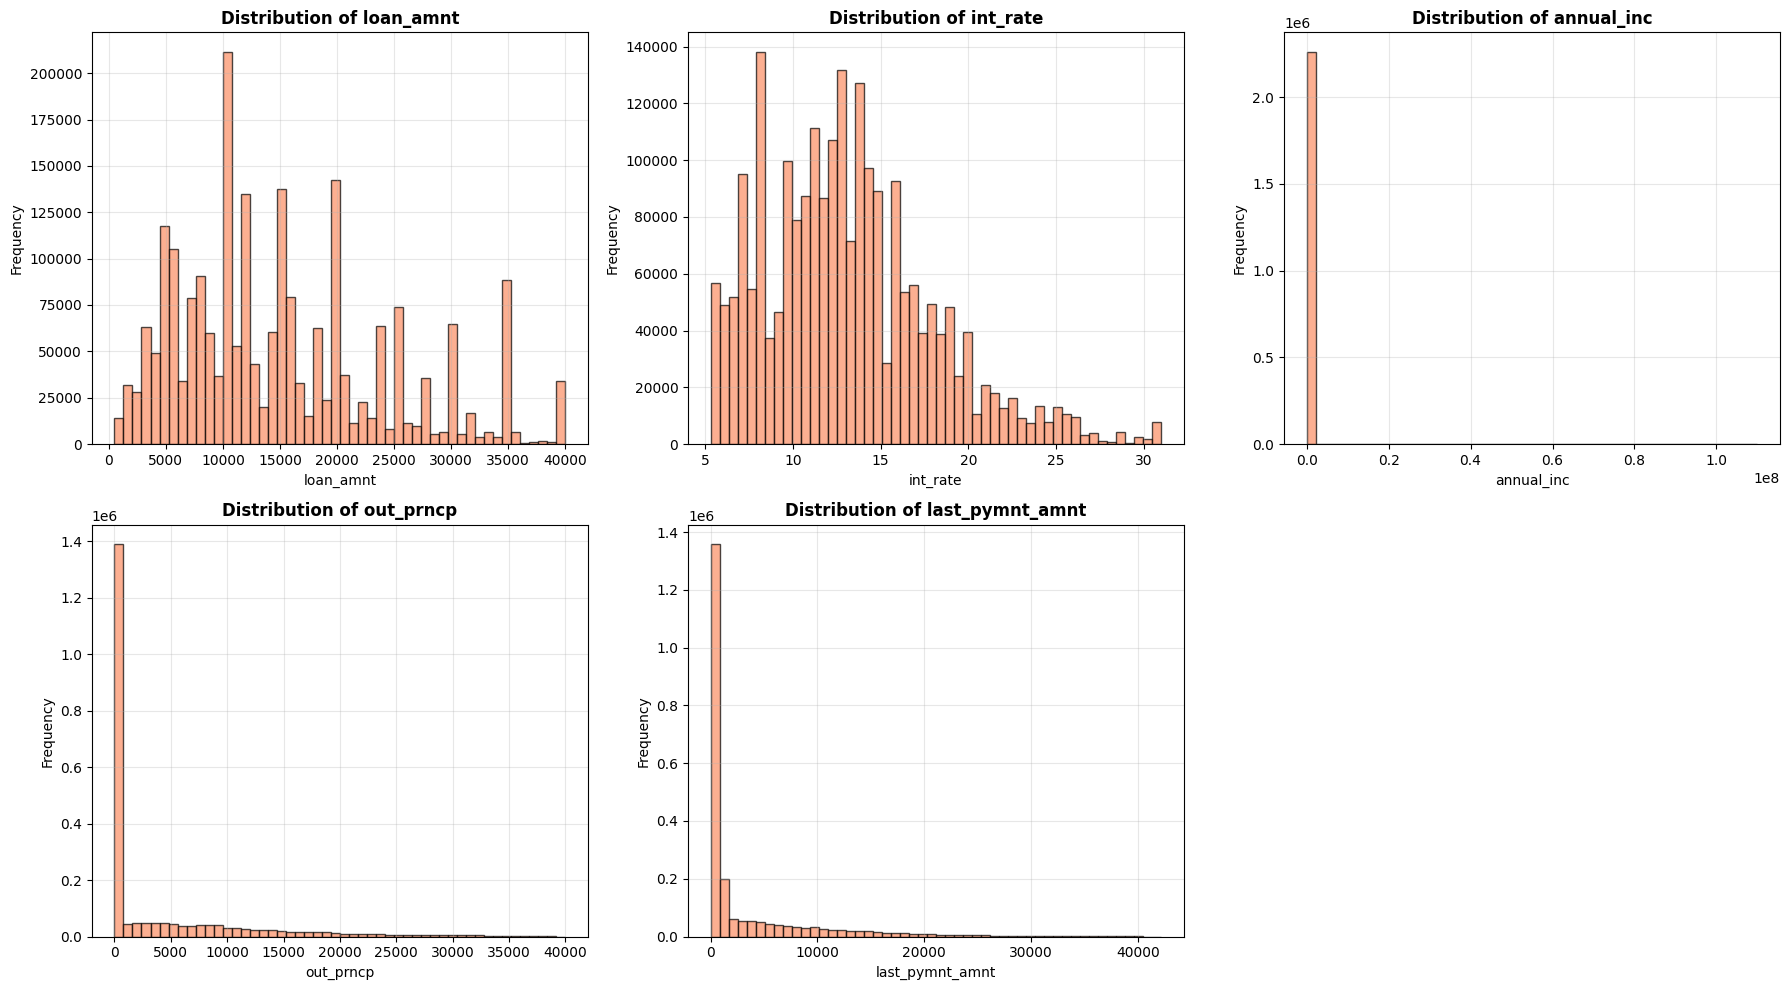

In [ ]:

potential_numerical = ['loan_amnt','int_rate', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'out_prncp', 'last_pymnt_amnt']
numerical_features = [f for f in potential_numerical if f in df.columns]


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=50, alpha=0.7, color = palette[-1], edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].grid(alpha=0.3)

for idx in range(len(numerical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_8448\2197994677.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\arnav\AppData\Local\Temp\ipykernel_8448\2197994677.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\arnav\AppData\Local\Temp\ipykernel_8448\2197994677.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\arnav\AppData\Local\Temp\ipykernel_8448\2197994677.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

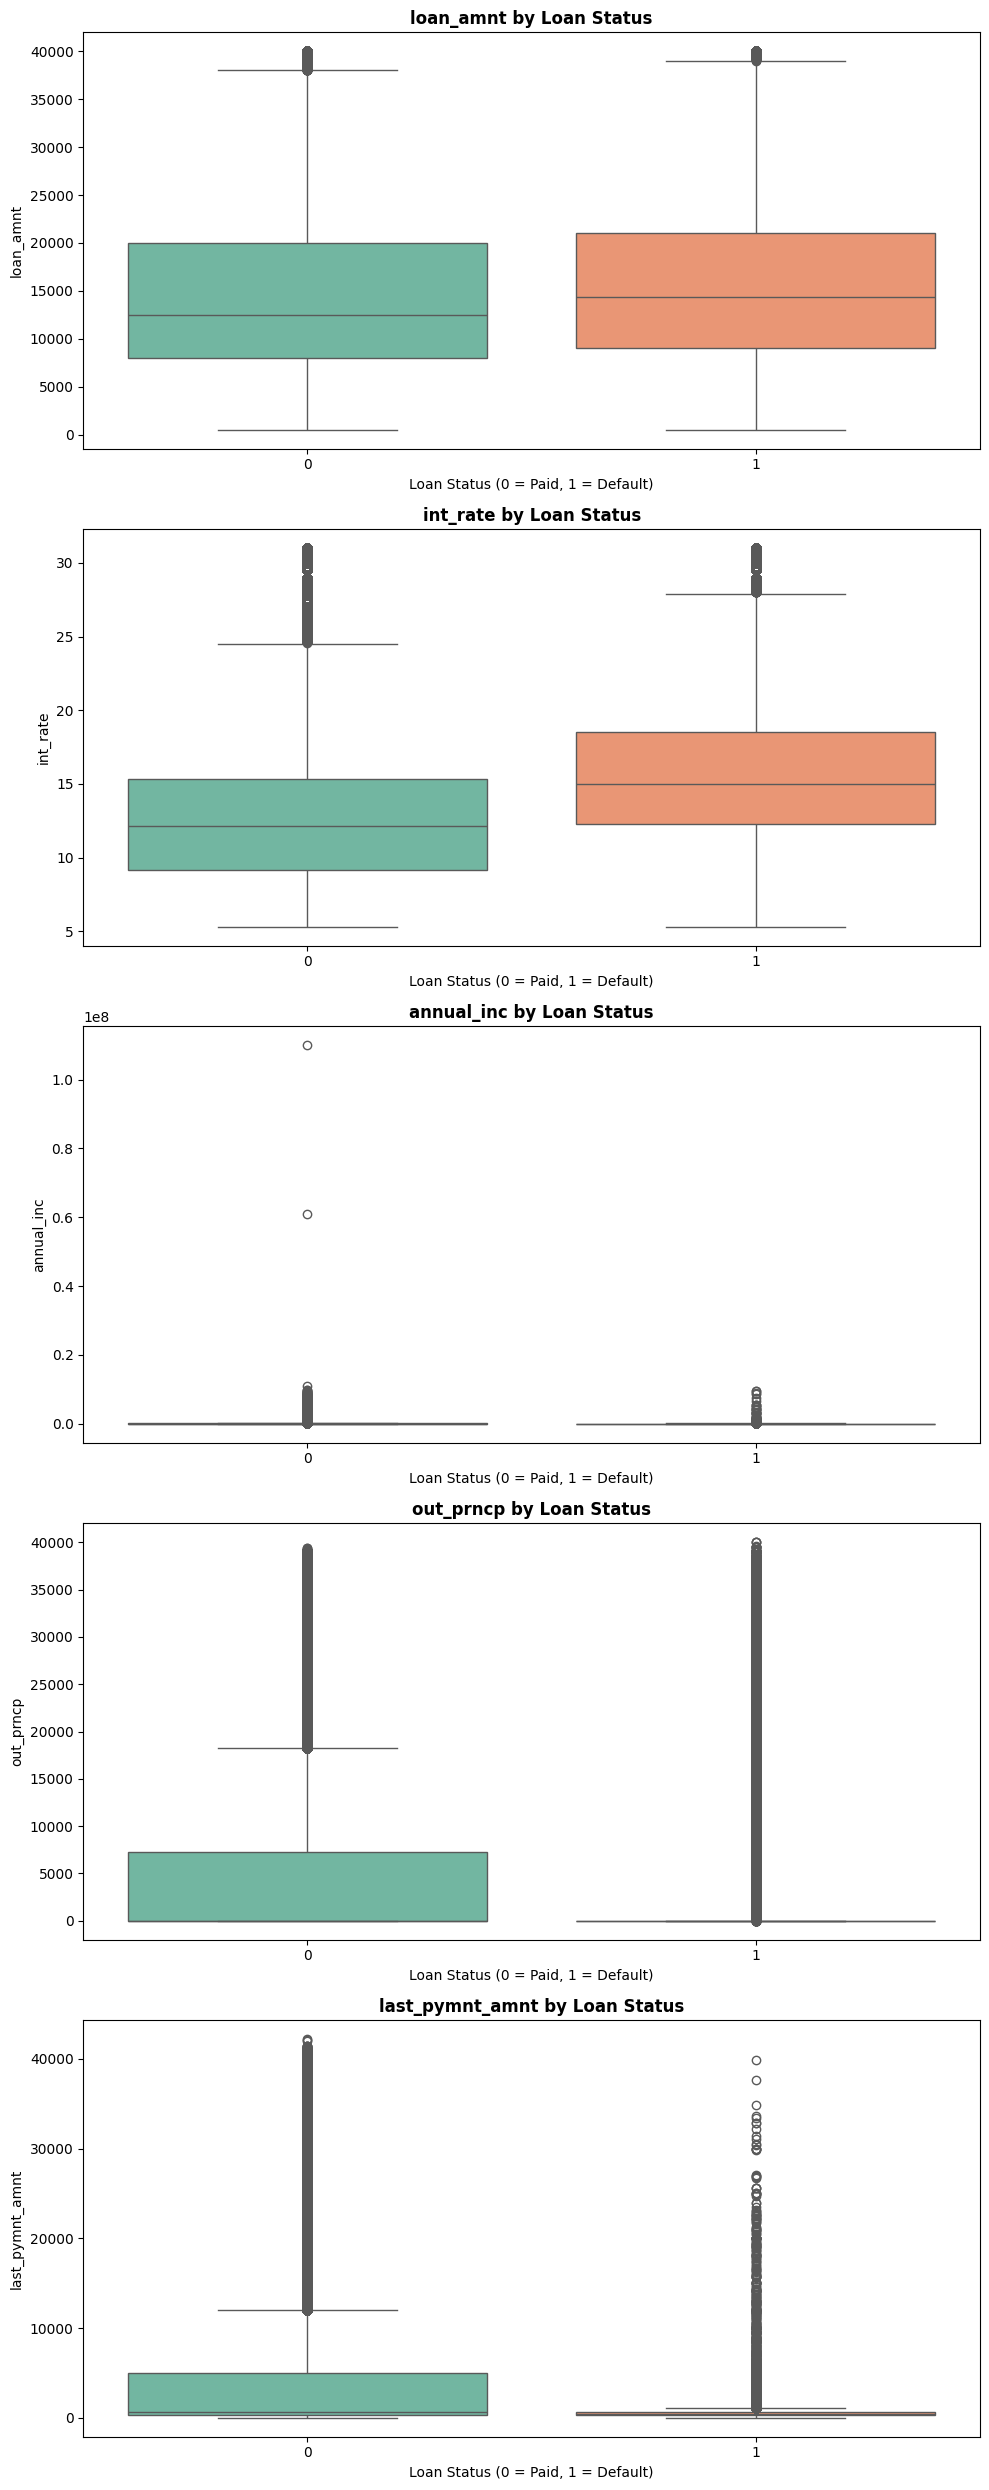

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2", 2)


num_features = len(numerical_features)


fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

if num_features == 1:
    axes = [axes]

for idx, col in enumerate(numerical_features):
    sns.boxplot(
        data=df,
        x='loan_status_binary',
        y=col,
        ax=axes[idx],
        palette=palette
    )
    axes[idx].set_title(f'{col} by Loan Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Loan Status (0 = Paid, 1 = Default)', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


In [18]:
df["fico_score"] = ((df["fico_range_low"] + df["fico_range_high"]) / 2).round().astype(int)

df.drop(columns=["fico_range_low", "fico_range_high"], inplace=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260451 entries, 0 to 2260450
Data columns (total 48 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   loan_amnt                   float64
 1   funded_amnt                 float64
 2   funded_amnt_inv             float64
 3   term                        object 
 4   int_rate                    float64
 5   installment                 float64
 6   grade                       object 
 7   sub_grade                   object 
 8   home_ownership              object 
 9   annual_inc                  float64
 10  verification_status         object 
 11  issue_d                     object 
 12  loan_status                 object 
 13  pymnt_plan                  object 
 14  purpose                     object 
 15  delinq_2yrs                 float64
 16  earliest_cr_line            object 
 17  inq_last_6mths              float64
 18  open_acc                    float64
 19  pub_rec              

In [ ]:
df_sampled= df.sample(1000000, random_state=42)


In [21]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 1550414 to 717143
Data columns (total 48 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1000000 non-null  float64
 1   funded_amnt                 1000000 non-null  float64
 2   funded_amnt_inv             1000000 non-null  float64
 3   term                        1000000 non-null  object 
 4   int_rate                    1000000 non-null  float64
 5   installment                 1000000 non-null  float64
 6   grade                       1000000 non-null  object 
 7   sub_grade                   1000000 non-null  object 
 8   home_ownership              1000000 non-null  object 
 9   annual_inc                  1000000 non-null  float64
 10  verification_status         1000000 non-null  object 
 11  issue_d                     1000000 non-null  object 
 12  loan_status                 1000000 non-null  object 
 1

In [22]:
class_dist = df_sampled['loan_status_binary'].value_counts().sort_index()

print(f"\nClass distribution:")
for cls, count in class_dist.items():
    label = "Paid" if cls == 0 else "Default"
    print(f"  {cls} ({label}): {count:,} ({count/len(df_sampled)*100:.1f}%)")


Class distribution:
  0 (Paid): 865,835 (86.6%)
  1 (Default): 134,165 (13.4%)


In [23]:
df_sampled['open_acc']

1550414     7.0
419123     13.0
1178698    28.0
1510854     7.0
1202019    10.0
           ... 
1668050    12.0
1190144     7.0
462062      2.0
1938434     4.0
717143      7.0
Name: open_acc, Length: 1000000, dtype: float64

In [24]:
df['inq_last_6mths'].value_counts()

inq_last_6mths
0.0     1381634
1.0      584343
2.0      200197
3.0       68995
4.0       17373
5.0        6230
6.0        1228
7.0         195
8.0         121
9.0          47
10.0         23
11.0         15
12.0         14
15.0          8
14.0          5
13.0          4
18.0          3
16.0          3
17.0          2
24.0          2
19.0          2
33.0          1
32.0          1
31.0          1
28.0          1
25.0          1
27.0          1
20.0          1
Name: count, dtype: int64

In [25]:
df_sampled['inq_last_6mths'] = df_sampled['inq_last_6mths'].astype(int)


In [26]:
df_sampled['delinq_2yrs']

1550414    1.0
419123     0.0
1178698    0.0
1510854    0.0
1202019    0.0
          ... 
1668050    0.0
1190144    0.0
462062     0.0
1938434    0.0
717143     0.0
Name: delinq_2yrs, Length: 1000000, dtype: float64

In [27]:
df_sampled['delinq_2yrs'].value_counts()

delinq_2yrs
0.0     813872
1.0     124231
2.0      35911
3.0      13095
4.0       5813
5.0       2891
6.0       1635
7.0        915
8.0        533
9.0        358
10.0       234
11.0       145
12.0       116
13.0        82
14.0        50
15.0        39
16.0        25
18.0        14
19.0         9
17.0         9
20.0         5
21.0         5
22.0         3
36.0         1
24.0         1
25.0         1
26.0         1
27.0         1
35.0         1
58.0         1
29.0         1
28.0         1
30.0         1
Name: count, dtype: int64

In [28]:
categorical_cols = df_sampled.select_dtypes(include=["object","category"]).columns.tolist()


In [29]:
categorical_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [30]:
df_sampled['term'].value_counts()

term
36 months    712038
60 months    287962
Name: count, dtype: int64

In [31]:
df_sampled["term"] = df_sampled["term"].str.extract("(\d+)").astype(int)


In [32]:
df_sampled['term'].dtype

dtype('int32')

In [33]:
numeric_cols = df_sampled.select_dtypes(include=["int","int64", "float64"]).columns.tolist()
print(numeric_cols)
print(len(numeric_cols))


['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'loan_status_binary', 'fico_score']
33


In [34]:
df_numeric = df_sampled[numeric_cols].copy()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 1550414 to 717143
Data columns (total 33 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1000000 non-null  float64
 1   funded_amnt                 1000000 non-null  float64
 2   funded_amnt_inv             1000000 non-null  float64
 3   term                        1000000 non-null  int32  
 4   int_rate                    1000000 non-null  float64
 5   installment                 1000000 non-null  float64
 6   annual_inc                  1000000 non-null  float64
 7   delinq_2yrs                 1000000 non-null  float64
 8   inq_last_6mths              1000000 non-null  int32  
 9   open_acc                    1000000 non-null  float64
 10  pub_rec                     1000000 non-null  float64
 11  revol_bal                   1000000 non-null  float64
 12  total_acc                   1000000 non-null  float64
 1

In [35]:
df_numeric = df_numeric.drop(columns=['pub_rec'])

In [36]:
keep_cols = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 
    'installment', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 
    'open_acc', 'revol_bal', 'total_acc', 
    'last_fico_range_high', 'last_fico_range_low', 
    'collections_12_mths_ex_med', 'policy_code', 'tax_liens', 
    'fico_score'
]
X = df_numeric[keep_cols]


In [37]:
y = df_sampled['loan_status_binary']

In [41]:
from sklearn.model_selection import train_test_split

X_new = X.drop(columns=['funded_amnt', 'funded_amnt_inv','last_fico_range_high','term','delinq_2yrs'])

X_train , X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.25, random_state=42, stratify=y
)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

early_stop = EarlyStopping(
    monitor='val_auc',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

print("\n📌 Deep Learning Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class Weights: {0: 0.5774774552801458, 1: 3.726745110510415}


c:\Users\arnav\anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 12,609 (49.25 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8440 - auc: 0.9153 - loss: 0.3686 - val_accuracy: 0.8810 - val_auc: 0.9408 - val_loss: 0.3038
Epoch 2/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8782 - auc: 0.9361 - loss: 0.3163 - val_accuracy: 0.8855 - val_auc: 0.9413 - val_loss: 0.2993
Epoch 3/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8814 - auc: 0.9384 - loss: 0.3090 - val_accuracy: 0.8786 - val_auc: 0.9417 - val_loss: 0.3125
Epoch 4/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8821 - auc: 0.9392 - loss: 0.3072 - val_accuracy: 0.8831 - val_auc: 0.9419 - val_loss: 0.3025
Epoch 5/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8820 - auc: 0.9381 - loss: 0.3102 - val_accuracy: 0.8872 - val_auc: 0.9419 - val_loss: 0.2932
Epoch 6/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8834 - auc: 0.9397 - loss: 0.3060 - val_accuracy: 0.8853 - val_auc: 0.9418 - val_loss: 0.2996
Epoch 7/50
2344/2344 ━━━━━━

In [298]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'inq_last_6mths',
       'open_acc', 'revol_bal', 'total_acc', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'tax_liens', 'fico_score'],
      dtype='object')

In [ ]:

import numpy as np
from d3rlpy.dataset import MDPDataset
from d3rlpy.algos import DiscreteCQLConfig
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


states = X_new.values
N = states.shape[0]


loan_status = y.values           
actions = np.where(loan_status == 0, 1, 0).astype(np.int64)


loan_amt = df_sampled.loc[X_new.index, "loan_amnt"].values
int_rate = df_sampled.loc[X_new.index, "int_rate"].values / 100

rewards = np.zeros(N, dtype=float)

approve_mask = actions == 1
good_mask = approve_mask & (loan_status == 0)

rewards[good_mask] = loan_amt[good_mask] * int_rate[good_mask]



terminals = np.ones(N, dtype=bool)


dataset = MDPDataset(
    observations=states,
    actions=actions,
    rewards=rewards,
    terminals=terminals
)

config = DiscreteCQLConfig()
cql = config.create(device="cpu")

cql.fit(
    dataset=dataset,
    n_steps=200000,
    show_progress=True
)


X_test_rl = X_test.values
rl_actions_test = np.array(cql.predict(X_test_rl)).astype(int)


y_action_test = np.where(y_test.values == 0, 1, 0)


print("\n📌 RL Loan Approval Classification Metrics:")
print("Accuracy:", accuracy_score(y_action_test, rl_actions_test))
print("F1 Score:", f1_score(y_action_test, rl_actions_test))

print("\nClassification Report:")
print(classification_report(y_action_test, rl_actions_test))

print("\nConfusion Matrix:")
print(confusion_matrix(y_action_test, rl_actions_test))

loan_amt_test = df_sampled.loc[y_test.index, "loan_amnt"].values
int_rate_test = df_sampled.loc[y_test.index, "int_rate"].values / 100

real_reward = np.zeros(len(y_test))

approve_mask_test = rl_actions_test == 1
good_mask_test = approve_mask_test & (y_test.values == 0)

real_reward[good_mask_test] = loan_amt_test[good_mask_test] * int_rate_test[good_mask_test]


print("\n📌 RL Total Profit:", real_reward.sum())
print("📌 RL Average Profit per Customer:", real_reward.mean())

print("\n🔍 Example RL Decisions (first 10):")
for i in range(10):
    print(
        f"Index {i} | RL Action={rl_actions_test[i]} | "
        f"True Action={y_action_test[i]} | Profit={real_reward[i]}"
    )


2025-12-12 04:08.42 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('int64')], shape=[(1,)]) observation_signature=Signature(dtype=[dtype('float64')], shape=[(13,)]) reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)])
2025-12-12 04:08.42 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.DISCRETE: 2>
2025-12-12 04:08.45 [info     ] Action size has been automatically determined. action_size=2
2025-12-12 04:08.47 [info     ] dataset info                   dataset_info=DatasetInfo(observation_signature=Signature(dtype=[dtype('float64')], shape=[(13,)]), action_signature=Signature(dtype=[dtype('int64')], shape=[(1,)]), reward_signature=Signature(dtype=[dtype('float64')], shape=[(1,)]), action_space=<ActionSpace.DISCRETE: 2>, action_size=2)
2025-12-12 04:08.47 [debug    ] Building models...            
2025-12-12 04:08.47 [debug    ] Models have been built.       
2025-12-12 04:08.47 [info  

Epoch 1/20: 100%|██████████| 10000/10000 [00:42<00:00, 238.07it/s, loss=762, td_loss=608, conservative_loss=154]     


2025-12-12 04:09.29 [info     ] DiscreteCQL_20251212040847: epoch=1 step=10000 epoch=1 metrics={'time_sample_batch': 0.0004934990882873536, 'time_algorithm_update': 0.0034992176532745362, 'loss': 761.9476209716797, 'td_loss': 608.4420268310547, 'conservative_loss': 153.50559387950898, 'time_step': 0.0041605892896652225} step=10000
2025-12-12 04:09.29 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_10000.d3


Epoch 2/20: 100%|██████████| 10000/10000 [00:45<00:00, 221.81it/s, loss=746, td_loss=610, conservative_loss=136]


2025-12-12 04:10.14 [info     ] DiscreteCQL_20251212040847: epoch=2 step=20000 epoch=2 metrics={'time_sample_batch': 0.000521877384185791, 'time_algorithm_update': 0.003764173436164856, 'loss': 745.9336784637451, 'td_loss': 609.887636920166, 'conservative_loss': 136.04604131879807, 'time_step': 0.004459224081039429} step=20000
2025-12-12 04:10.14 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_20000.d3


Epoch 3/20: 100%|██████████| 10000/10000 [00:45<00:00, 220.68it/s, loss=750, td_loss=616, conservative_loss=133]


2025-12-12 04:10.59 [info     ] DiscreteCQL_20251212040847: epoch=3 step=30000 epoch=3 metrics={'time_sample_batch': 0.0005178134202957153, 'time_algorithm_update': 0.0037966883420944213, 'loss': 749.7153571105957, 'td_loss': 616.2716794952393, 'conservative_loss': 133.4436774618268, 'time_step': 0.004486462116241455} step=30000
2025-12-12 04:10.59 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_30000.d3


Epoch 4/20: 100%|██████████| 10000/10000 [00:45<00:00, 219.30it/s, loss=733, td_loss=613, conservative_loss=120]


2025-12-12 04:11.45 [info     ] DiscreteCQL_20251212040847: epoch=4 step=40000 epoch=4 metrics={'time_sample_batch': 0.0005158150434494018, 'time_algorithm_update': 0.003839984679222107, 'loss': 733.3215477874755, 'td_loss': 612.9250558532715, 'conservative_loss': 120.39649188727736, 'time_step': 0.004513539433479309} step=40000
2025-12-12 04:11.45 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_40000.d3


Epoch 5/20: 100%|██████████| 10000/10000 [00:45<00:00, 218.84it/s, loss=730, td_loss=600, conservative_loss=130]


2025-12-12 04:12.31 [info     ] DiscreteCQL_20251212040847: epoch=5 step=50000 epoch=5 metrics={'time_sample_batch': 0.0005150463342666627, 'time_algorithm_update': 0.003850233292579651, 'loss': 729.8628612182617, 'td_loss': 599.6245219512939, 'conservative_loss': 130.23833951033353, 'time_step': 0.004523706483840943} step=50000
2025-12-12 04:12.31 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_50000.d3


Epoch 6/20: 100%|██████████| 10000/10000 [00:45<00:00, 218.17it/s, loss=722, td_loss=597, conservative_loss=125]


2025-12-12 04:13.16 [info     ] DiscreteCQL_20251212040847: epoch=6 step=60000 epoch=6 metrics={'time_sample_batch': 0.0005401393175125122, 'time_algorithm_update': 0.0038408819913864135, 'loss': 722.1518002746582, 'td_loss': 597.4234325775146, 'conservative_loss': 124.72836765115261, 'time_step': 0.004544118070602417} step=60000
2025-12-12 04:13.16 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_60000.d3


Epoch 7/20: 100%|██████████| 10000/10000 [00:45<00:00, 220.05it/s, loss=710, td_loss=562, conservative_loss=148]


2025-12-12 04:14.02 [info     ] DiscreteCQL_20251212040847: epoch=7 step=70000 epoch=7 metrics={'time_sample_batch': 0.0005015332221984864, 'time_algorithm_update': 0.003837930488586426, 'loss': 709.6475372161865, 'td_loss': 561.7392006347657, 'conservative_loss': 147.90833681986928, 'time_step': 0.004504889249801636} step=70000
2025-12-12 04:14.02 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_70000.d3


Epoch 8/20: 100%|██████████| 10000/10000 [00:45<00:00, 218.21it/s, loss=701, td_loss=553, conservative_loss=148]


2025-12-12 04:14.48 [info     ] DiscreteCQL_20251212040847: epoch=8 step=80000 epoch=8 metrics={'time_sample_batch': 0.0005196799039840698, 'time_algorithm_update': 0.0038527791023254395, 'loss': 700.9140403762817, 'td_loss': 552.6453638870239, 'conservative_loss': 148.26867693331837, 'time_step': 0.004542453980445862} step=80000
2025-12-12 04:14.48 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_80000.d3


Epoch 9/20: 100%|██████████| 10000/10000 [00:46<00:00, 215.10it/s, loss=668, td_loss=505, conservative_loss=163]


2025-12-12 04:15.34 [info     ] DiscreteCQL_20251212040847: epoch=9 step=90000 epoch=9 metrics={'time_sample_batch': 0.0005447147130966186, 'time_algorithm_update': 0.003882957983016968, 'loss': 668.1333560638428, 'td_loss': 505.0592824432373, 'conservative_loss': 163.07407353450955, 'time_step': 0.00460375292301178} step=90000
2025-12-12 04:15.34 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_90000.d3


Epoch 10/20: 100%|██████████| 10000/10000 [00:45<00:00, 217.90it/s, loss=648, td_loss=463, conservative_loss=185]


2025-12-12 04:16.20 [info     ] DiscreteCQL_20251212040847: epoch=10 step=100000 epoch=10 metrics={'time_sample_batch': 0.0005024126768112182, 'time_algorithm_update': 0.0038903501987457277, 'loss': 647.7814338226318, 'td_loss': 462.85680716552736, 'conservative_loss': 184.92462692589612, 'time_step': 0.004546000289916992} step=100000
2025-12-12 04:16.20 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_100000.d3


Epoch 11/20: 100%|██████████| 10000/10000 [00:45<00:00, 219.78it/s, loss=624, td_loss=426, conservative_loss=198]


2025-12-12 04:17.06 [info     ] DiscreteCQL_20251212040847: epoch=11 step=110000 epoch=11 metrics={'time_sample_batch': 0.0005013778209686279, 'time_algorithm_update': 0.0038432511568069457, 'loss': 624.0109425003052, 'td_loss': 426.154264263916, 'conservative_loss': 197.85667828111352, 'time_step': 0.004506537199020386} step=110000
2025-12-12 04:17.06 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_110000.d3


Epoch 12/20: 100%|██████████| 10000/10000 [00:46<00:00, 215.22it/s, loss=633, td_loss=437, conservative_loss=196]


2025-12-12 04:17.52 [info     ] DiscreteCQL_20251212040847: epoch=12 step=120000 epoch=12 metrics={'time_sample_batch': 0.0005031755447387695, 'time_algorithm_update': 0.003944645166397095, 'loss': 633.116375843811, 'td_loss': 436.8678594421387, 'conservative_loss': 196.24851633396148, 'time_step': 0.00460316436290741} step=120000
2025-12-12 04:17.52 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_120000.d3


Epoch 13/20: 100%|██████████| 10000/10000 [00:46<00:00, 215.88it/s, loss=598, td_loss=400, conservative_loss=198]


2025-12-12 04:18.39 [info     ] DiscreteCQL_20251212040847: epoch=13 step=130000 epoch=13 metrics={'time_sample_batch': 0.000504419183731079, 'time_algorithm_update': 0.003926860070228576, 'loss': 597.5908666381836, 'td_loss': 399.67044083099364, 'conservative_loss': 197.92042575577497, 'time_step': 0.004589192867279053} step=130000
2025-12-12 04:18.39 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_130000.d3


Epoch 14/20: 100%|██████████| 10000/10000 [00:45<00:00, 219.77it/s, loss=581, td_loss=381, conservative_loss=201]


2025-12-12 04:19.24 [info     ] DiscreteCQL_20251212040847: epoch=14 step=140000 epoch=14 metrics={'time_sample_batch': 0.0004991750478744506, 'time_algorithm_update': 0.0038450856924057007, 'loss': 581.4467887390136, 'td_loss': 380.6409715438843, 'conservative_loss': 200.80581734385044, 'time_step': 0.004504382395744324} step=140000
2025-12-12 04:19.24 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_140000.d3


Epoch 15/20: 100%|██████████| 10000/10000 [00:46<00:00, 217.07it/s, loss=565, td_loss=356, conservative_loss=209]


2025-12-12 04:20.10 [info     ] DiscreteCQL_20251212040847: epoch=15 step=150000 epoch=15 metrics={'time_sample_batch': 0.000489882493019104, 'time_algorithm_update': 0.0039064697265625, 'loss': 564.9428881469727, 'td_loss': 355.5742126602173, 'conservative_loss': 209.36867574465572, 'time_step': 0.0045642188549041745} step=150000
2025-12-12 04:20.10 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_150000.d3


Epoch 16/20: 100%|██████████| 10000/10000 [00:45<00:00, 219.04it/s, loss=545, td_loss=335, conservative_loss=210]


2025-12-12 04:20.56 [info     ] DiscreteCQL_20251212040847: epoch=16 step=160000 epoch=16 metrics={'time_sample_batch': 0.0005086093425750733, 'time_algorithm_update': 0.0038413952589035033, 'loss': 544.56614977417, 'td_loss': 334.82738292999267, 'conservative_loss': 209.73876676711737, 'time_step': 0.004521184968948364} step=160000
2025-12-12 04:20.56 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_160000.d3


Epoch 17/20: 100%|██████████| 10000/10000 [00:46<00:00, 216.51it/s, loss=528, td_loss=315, conservative_loss=212]


2025-12-12 04:21.42 [info     ] DiscreteCQL_20251212040847: epoch=17 step=170000 epoch=17 metrics={'time_sample_batch': 0.0004998195171356201, 'time_algorithm_update': 0.003918925333023071, 'loss': 528.008334463501, 'td_loss': 315.47873425674436, 'conservative_loss': 212.52960038546883, 'time_step': 0.004575799083709716} step=170000
2025-12-12 04:21.42 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_170000.d3


Epoch 18/20: 100%|██████████| 10000/10000 [00:45<00:00, 217.77it/s, loss=517, td_loss=303, conservative_loss=214]


2025-12-12 04:22.28 [info     ] DiscreteCQL_20251212040847: epoch=18 step=180000 epoch=18 metrics={'time_sample_batch': 0.000480565333366394, 'time_algorithm_update': 0.003909357237815857, 'loss': 516.9225199768066, 'td_loss': 303.2348341690063, 'conservative_loss': 213.68768561280817, 'time_step': 0.0045501785993576046} step=180000
2025-12-12 04:22.28 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_180000.d3


Epoch 19/20: 100%|██████████| 10000/10000 [00:45<00:00, 219.35it/s, loss=498, td_loss=275, conservative_loss=223]


2025-12-12 04:23.14 [info     ] DiscreteCQL_20251212040847: epoch=19 step=190000 epoch=19 metrics={'time_sample_batch': 0.0004996092557907105, 'time_algorithm_update': 0.003854715347290039, 'loss': 497.98102729644773, 'td_loss': 274.753275365448, 'conservative_loss': 223.2277518989276, 'time_step': 0.004516266822814942} step=190000
2025-12-12 04:23.14 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_190000.d3


Epoch 20/20: 100%|██████████| 10000/10000 [00:45<00:00, 219.95it/s, loss=481, td_loss=257, conservative_loss=224]


2025-12-12 04:23.59 [info     ] DiscreteCQL_20251212040847: epoch=20 step=200000 epoch=20 metrics={'time_sample_batch': 0.0004983088254928589, 'time_algorithm_update': 0.0038535613536834715, 'loss': 480.92488388519286, 'td_loss': 256.74402635650637, 'conservative_loss': 224.1808575446829, 'time_step': 0.004504794383049011} step=200000
2025-12-12 04:23.59 [info     ] Model parameters are saved to d3rlpy_logs\DiscreteCQL_20251212040847\model_200000.d3

📌 RL Loan Approval Classification Metrics:
Accuracy: 0.87246
F1 Score: 0.9310345573428676

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.09      0.15     33541
           1       0.88      0.99      0.93    216459

    accuracy                           0.87    250000
   macro avg       0.79      0.54      0.54    250000
weighted avg       0.85      0.87      0.83    250000


Confusion Matrix:
[[  2891  30650]
 [  1235 215224]]

📌 RL Total Profit: 418111362.03249997
📌 RL Averag